In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

from scipy import stats

In [2]:
x = pd.read_csv('train_values.csv', index_col='row_id')
y = pd.read_csv('train_labels.csv', index_col='row_id')

In [3]:
x.filter(like='sat').count()

admissions__sat_scores_25th_percentile_critical_reading    1708
admissions__sat_scores_25th_percentile_math                1733
admissions__sat_scores_25th_percentile_writing             1012
admissions__sat_scores_75th_percentile_critical_reading    1708
admissions__sat_scores_75th_percentile_math                1733
admissions__sat_scores_75th_percentile_writing             1012
admissions__sat_scores_average_by_ope_id                   2046
admissions__sat_scores_average_overall                     1889
admissions__sat_scores_midpoint_critical_reading           1708
admissions__sat_scores_midpoint_math                       1733
admissions__sat_scores_midpoint_writing                    1012
dtype: int64

In [4]:
filtered = pd.read_csv('repayment_rates_filtered.csv').transpose()
features = list(filtered.iloc[1:200,0].index)

In [5]:
def num_bach(df):
    return df.filter(like='_bach').replace(0,np.nan).sum(axis=1)

x['custom__academics__num_bach'] = num_bach(x)

aid_clusters = ['aid__cumulative_debt_75th_percentile', 
        'aid__cumulative_debt_90th_percentile',
        'aid__median_debt_completers_monthly_payments', 
        'aid__median_debt_completers_overall'
       ]

cost_clusters = ['cost__attendance_academic_year',
                'cost__tuition_in_state']

kmeans = KMeans(n_clusters=2, random_state=0)

temp = x.loc[:, aid_clusters]
temp.fillna(temp.mean(), inplace=True)
kmeans.fit(temp)
x['custom__aid_clusters'] = kmeans.labels_ 

temp = x.loc[:, cost_clusters]
temp.fillna(temp.mean(), inplace=True)
kmeans.fit(temp)
x['custom__cost_clusters'] = kmeans.labels_ 

In [6]:
temp = x.school__religious_affiliation.isin(['myw',
                                            'cxp',
                                            'pdf',
                                            'aiy',
                                            'thg',
                                            'zug',
                                            'sdh',
                                            'bmv',
                                            'fxo',
                                            'qys',
                                            'nnm',
                                            'onn',
                                            'ibe',
                                            'ntl',
                                            'smi',
                                            'aai',
                                            'huu',
                                            'mix',
                                            'dpu',
                                            'fuf',
                                            'dqz',
                                            'hmn',
                                            'xds',
                                            'qzo',
                                            'mky',
                                            'hap',
                                            'fiy',
                                            'gju',
                                            'lrj',
                                            'emi',
                                            'ddx',
                                            'jqf'])

print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__religious_high'] = temp.astype('int')

temp = x.school__religious_affiliation.isin(['wxa', 
                                             'prn', 
                                             'qyb', 
                                             'nhu',
                                             'uac', 
                                             'rgp', 
                                             'iqp',])

print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])


x['custom__religious_low'] = temp.astype('int')
x.drop('school__religious_affiliation', axis=1, inplace=True)

0.21096959305
-0.212410939605


In [7]:
temp = x.school__state.isin(['tus', 
                                           'nni',
                                          'noz',
                                           'ugr',
                                           'aku',
                                           'kta',
                                           'qbv',
                                           'iju',
                                           'msx',
                                           'qid',
                                           'fen',
                                           'bbk',
                                           'sbh',
                                           'uod',
                                           'gai',
                                           'idl',
                                           'gzi',
                                           'xfa',
                                           'qua',
                                           'yyg',
                                           'xtb',
                                           'dlg',
                                           'pgp',
                                           'krj',
                                           'bxo',
                                           'zms',
                                           'ste',
                                          ])

print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__school_state_low'] = temp.astype('int')

temp = x.school__state.isin(['prq', 
                                           'mig', 
                                           'tdb', 
                                           'iya', 
                                           'wzk', 
                                           'afu', 
                                           'iyc', 
                                           'exw', 
                                           'npw', 
                                           'rmt',
                                           'jor',
                                           'cyf',
                                           'cmn',
                                           'ncw',
                                           'usz',
                                           'tlt',
                                           'kho',
                                           'xhl',
                                           'dhx',
                                           'nja',
                                           'ony',
                                           'rbl',
                                           'xgy',
                                           'fyo',
                                           'das',
                                           'fjm',
                                           'hgy'
                                          ])

print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__school_state_high'] = temp.astype('int')

x.drop('school__state', axis=1, inplace=True)

-0.324810086314
0.331302272294


In [8]:
print(stats.pearsonr(x.school__degrees_awarded_highest.isin(['Graduate degree']).astype('int'), y['repayment_rate'])[0])
x['custom__school_degrees_awarded_graduate'] = x.school__degrees_awarded_highest.isin(['Graduate degree']).astype('int')

x.drop('school__degrees_awarded_highest', axis=1, inplace=True)

0.450353885251


In [9]:
print(stats.pearsonr(x.academics__program_bachelors_business_marketing.isin([0]).astype('int'), y['repayment_rate'])[0])

x['custom__academics_program_bachelors_business_0'] = x.academics__program_bachelors_business_marketing.isin([0]).astype('int')

-0.229565066285


In [10]:
temp = x.school__region_id.isin(['Southwest (AZ, NM, OK, TX)', 
                                 'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
                                 'Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)',
                                ])

print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__school_region_low'] = temp.astype('int')

temp = x.school__region_id.isin(['New England (CT, ME, MA, NH, RI, VT)',
                                'Mid East (DE, DC, MD, NJ, NY, PA)',
                                'Plains (IA, KS, MN, MO, NE, ND, SD)',
                                'U.S. Service Schools'])
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__schools_region_high'] = temp.astype('int')

x.drop('school__region_id', axis=1, inplace=True)

-0.26881832288
0.276562332204


In [11]:
temp = x.school__carnegie_undergrad.isin(['Four-year, full-time, inclusive, lower transfer-in', 
                                         'Four-year, higher part-time',
                                         'Four-year, medium full-time, inclusive, lower transfer-in',
                                         'Two-year, medium full-time',
                                         'Two-year, higher full-time',
                                         'Not applicable',
                                         'Two-year, mixed part/full-time',
                                         'Four-year, medium full-time, inclusive, higher transfer-in',
                                         'Two-year, higher part-time',])
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__carnegie_undergrad_low'] = temp.astype('int')

temp = x.school__carnegie_undergrad.isin(['Four-year, full-time, more selective, lower transfer-in',
                                         'Four-year, full-time, more selective, higher transfer-in',
                                         'Four-year, full-time, selective, higher transfer-in',
                                         'Four-year, full-time, selective, lower transfer-in',
                                         'Four-year, medium full-time, selective, lower transfer-in',
                                         'Four-year, medium full-time, selective, higher transfer-in',
                                         'Not classified (Exclusively Graduate)'
                                         ])
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__carnegie_undergrad_high'] = temp.astype('int')

x.drop('school__carnegie_undergrad', axis=1, inplace=True)

-0.324435522706
0.3619792882


In [12]:
temp = x.school__carnegie_size_setting.isin(['Four-year, large, highly residential',
                                             'Four-year, large, primarily residential',
                                             'Four-year, medium, highly residential',
                                             'Four-year, medium, primarily residential',
                                             'Four-year, small, highly residential',
                                             'Exclusively graduate/professional',
                                             'Four-year, small, primarily residential'
                                             #'Four-year, very small, primarily residential'
                                         ])
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__school_carnegie_size_setting_high'] = temp.astype('int')

temp = x.school__carnegie_size_setting.isin(['Four-year, very small, primarily nonresidential',
                                             'Not applicable',
                                             'Two-year, large',
                                             'Two-year, medium',
                                             'Two-year, small',
                                             'Two-year, very large',
                                             'Two-year, very small'
                                         ])
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__school_carnegie_size_setting_low'] = temp.astype('int')

x.drop('school__carnegie_size_setting', axis=1, inplace=True)

0.319534345332
-0.335825712785


In [13]:
temp = x.school__carnegie_basic.isin(['Baccalaureate Colleges: Arts & Sciences Focus',
                                      'Doctoral Universities: Highest Research Activity',
                                      "Master's Colleges & Universities: Larger Programs",
                                      'Doctoral Universities: Higher Research Activity',
                                      "Master's Colleges & Universities: Medium Programs",
                                      'Special Focus Four-Year: Medical Schools & Centers',
                                      "Master's Colleges & Universities: Small Programs",
                                      "Doctoral Universities: Moderate Research Activity",
                                      "Special Focus Four-Year: Law Schools",
                                      "Special Focus Four-Year: Engineering Schools",                                      
                                         ])
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__carnegie_basic_high'] = temp.astype('int')

temp = x.school__carnegie_basic.isin(['Not applicable',
                                      "Baccalaureate/Associate's Colleges: Mixed Baccalaureate/Associate's",
                                      "Special Focus Two-Year: Health Professions",
                                      "Baccalaureate/Associate's Colleges: Associate's Dominant",
                                      "Associate's Colleges: High Vocational & Technical-High Nontraditional",
                                      "Special Focus Four-Year: Other Technology-Related Schools",
                                      "Associate's Colleges: High Vocational & Technical-Mixed Traditional/Nontraditional",
                                      "Special Focus Two-Year: Other Fields",
                                      "Special Focus Four-Year: Business & Management Schools",
                                      "Associate's Colleges: Mixed Transfer/Vocational & Technical-Mixed Traditional/Nontraditional"
                                     ])
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__carnegie_basic_low'] = temp.astype('int')

x.drop('school__carnegie_basic', axis=1, inplace=True)

0.299194158695
-0.318549297739


In [14]:
temp = x.school__degrees_awarded_predominant.isin(["Predominantly bachelor's-degree granting",
                                                  "Entirely graduate-degree granting"
                                                  ])
    
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__schools_degrees_predominant_high'] = temp.astype('int')

x.drop('school__degrees_awarded_predominant', axis=1, inplace=True)

0.527068620351


In [15]:
temp = x.school__institutional_characteristics_level.isin(['4-year'])
    
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__schools_institutional_characteristics_level'] = temp.astype('int')

x.drop('school__institutional_characteristics_level', axis=1, inplace=True)

0.360751528648


In [16]:
temp = x.school__ownership.isin(["Private nonprofit", "Public"])
    
print(stats.pearsonr(temp.astype('int'), y['repayment_rate'])[0])
x['custom__schools_ownership'] = temp.astype('int')

x.drop('school__ownership', axis=1, inplace=True)

0.550159134626


In [17]:
drop_cols = [
    'aid__median_debt_number_dependent_students',
    'aid__median_debt_number_female_students',
    'student__FAFSA_applications',
    'student__demographics_men',
    'student__demographics_race_ethnicity_nhpi',
    'student__demographics_race_ethnicity_two_or_more',
    'student__demographics_race_ethnicity_unknown',
    'student__demographics_women',
    'student__family_income_dependent_students', 
    'student__size',
    'student__valid_dependency_status',
    'report_year',
    'school__online_only',
    'school__locale',
]

drop_cols.extend(list(x.filter(like='aid__median_debt_number')))
drop_cols.extend(list(x.filter(like='academics__program_')))
drop_cols.extend(list(x.filter(like='completion__completion')))
drop_cols.extend(list(x.filter(like='completion__completion_rate_l4yr')))
drop_cols.extend(list(x.filter(like='cost__')))
drop_cols.extend(list(x.filter(like='student__family_income')))
drop_cols.extend(list(x.filter(like='student__retention_rate')))

not_drop = ['academics__program_bachelors_philosophy_religious',
            'academics__program_percentage_language',
            'academics__program_percentage_biological',
            'academics__program_percentage_education',
            'academics__program_percentage_mathematics',
            'academics__program_percentage_english',
            'academics__program_percentage_history',
            'academics__program_percentage_physical_science',
            'academics__program_percentage_social_science',
            'academics__program_bachelors_biological',
            'academics__program_bachelors_communication',
            'academics__program_bachelors_education',
            'academics__program_bachelors_english',
            'academics__program_bachelors_ethnic_cultural_gender',
            'cost__title_iv_private_by_income_level_75001_110000',
            'student__demographics_veteran',
            'cost__title_iv_public_by_income_level_110001_plus',
            'completion__completion_cohort_4yr_100nt',
            'completion__completion_rate_l4yr_150_black',
            'cost__attendance_academic_year',
            'cost__avg_net_price_public',
            'cost__net_price_public_by_income_level_110001_plus',
            'cost__net_price_public_by_income_level_75000_plus',
            'cost__net_price_public_by_income_level_75001_110000',
            'cost__net_price_public_by_income_level_30001_75000',
            'cost__net_price_public_by_income_level_110001_plus',
            'cost__net_price_public_by_income_level_48001_75000',
            'cost__tuition_in_state',
            'cost__tuition_out_of_state',
            'student__retention_rate_four_year_full_time',
            'academics__program_bachelors_history',
            'academics__program_bachelors_humanities',
            'academics__program_bachelors_language',
            'academics__program_bachelors_mathematics',
            'academics__program_bachelors_multidiscipline',
            'academics__program_bachelors_parks_recreation_fitness',
            'academics__program_bachelors_physical_science',
            'academics__program_bachelors_psychology',
            'academics__program_bachelors_resources',
            'academics__program_bachelors_social_science',
            'academics__program_bachelors_visual_performing',
            'completion__completion_rate_4yr_100nt',
            'completion__completion_rate_4yr_150_2ormore',
            'completion__completion_rate_4yr_150_aian',
            'completion__completion_rate_4yr_150_asian',
            'completion__completion_rate_4yr_150_hispanic',
            'completion__completion_rate_4yr_150_nonresident_alien',
            'completion__completion_rate_4yr_150_race_unknown',
            'completion__completion_rate_4yr_150_white',
            'completion__completion_rate_4yr_150nt',
            'completion__completion_rate_4yr_150nt_pooled',
            'cost__title_iv_private_by_income_level_110001_plus',
            'cost__title_iv_private_by_income_level_48001_75000',
           ]

drop_cols = [i for i in drop_cols if i not in not_drop]

In [18]:
x.drop(drop_cols, axis=1, inplace=True)

In [19]:
log_cols = ['academics__program_percentage_english',
          'academics__program_percentage_history',
          'academics__program_percentage_social_science',
          'cost__title_iv_private_by_income_level_75001_110000',
          'cost__title_iv_public_by_income_level_110001_plus',
          'completion__completion_cohort_4yr_100nt',
          'cost__title_iv_private_by_income_level_75001_110000',
          'student__demographics_veteran',           
           ]

In [20]:
for col in log_cols:
    x['custom__log_{}'.format(col)] = x[col].map(lambda x: np.log(x*100+1)) #replace 0 because it skews results when using log transformation

In [21]:
x.replace(['Yes', 'No'], [1,0], inplace=True)
x.replace(['Main campus', 'Not main campus'], [1,0], inplace=True)

In [22]:
#pd.merge(pd.get_dummies(x.school__locale), y, left_index=True, right_index=True).corr()['repayment_rate'].sort_values(ascending=False)

In [23]:
df = pd.read_csv('train_filtered.csv')

In [24]:
df.drop('repayment_rate', axis=1, inplace=True)
df.head()

,student__share_lowincome_0_30000,student__demographics_avg_family_income,student__demographics_median_family_income,student__avg_dependent_income_2014dollars,student__students_with_pell_grant,student__share_highincome_75001_110000,student__share_highincome_110001plus,student__share_middleincome_48001_75000,student__share_firstgeneration_parents_somecollege,student__share_dependent_lowincome_0_300000,...,academics__program_percentage_communication,academics__program_bachelors_agriculture,school__degrees_awarded_predominant-Predominantly associate's-degree granting,academics__program_assoc_security_law_enforcement,aid__median_debt_number_independent_students,aid__median_debt_number_male_students,academics__program_percentage_personal_culinary,aid__median_debt_number_noncompleters,aid__cumulative_debt_number,aid__median_debt_number_overall
0,0.778809,20335.22912,13960.21190,29810.179859,0.882152,0.023426,0.011262,0.067484,0.446070,0.645992,...,0.0,0,1,0,8974,3635,0.0000,8689,10604,10604
1,0.664740,34349.37949,19856.48896,60493.637057,0.751445,0.104046,0.037895,0.105882,0.556962,0.383333,...,0.0,0,0,0,88,491,0.6471,45,152,152
2,0.568245,44633.02201,26556.79275,59930.484727,0.721448,0.105850,0.083565,0.086351,0.676737,0.414097,...,0.0,0,0,0,92,218,0.0000,102,235,235
3,0.893939,12362.52568,5061.00265,37588.010623,0.929293,0.065013,0.037895,0.105882,0.507196,0.500000,...,0.0,0,1,0,133,23,0.0000,84,153,153
4,0.701427,25252.54905,19212.71195,32706.234645,0.921612,0.030710,0.013698,0.087270,0.486716,0.581122,...,0.0,0,1,1,7584,4077,0.0131,9885,11355,11355


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, y['repayment_rate'], random_state=80) 

pipe = Pipeline([('imputer', Imputer(strategy='mean')),
                 ('regressor', RandomForestRegressor(n_estimators=200, n_jobs=-1, verbose=True, random_state=80))])

                     
pipe.fit(X_train, y_train)
print('Training Set Score: {:.3f}'.format(pipe.score(X_train, y_train)))
print('Test Set Score: {:.3f}'.format(pipe.score(X_test, y_test)))
print('RMSE: {}'.format(mean_squared_error(y_test, pipe.predict(X_test))))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   47.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Training Set Score: 0.984
Test Set Score: 0.893
RMSE: 47.46444853357393


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [26]:
pipe = Pipeline([('imputer', Imputer(strategy='mean')),
                 ('regressor', GradientBoostingRegressor(verbose=1, random_state=80))])
                      
pipe.fit(X_train, y_train)

print('Training Set Score: {:.3f}'.format(pipe.score(X_train, y_train)))
print('Test Set Score: {:.3f}'.format(pipe.score(X_test, y_test)))
print('RMSE: {}'.format(mean_squared_error(y_test, pipe.predict(X_test))))

      Iter       Train Loss   Remaining Time 
         1         378.1912            8.57s
         2         329.0335            8.07s
         3         288.1728            8.06s
         4         254.4489            8.06s
         5         226.6633            7.94s
         6         203.3248            7.91s
         7         183.9570            7.86s
         8         167.9541            7.68s
         9         154.5730            7.56s
        10         142.6051            7.52s
        20          86.8754            6.57s
        30          69.4369            5.81s
        40          61.1108            5.12s
        50          56.1476            4.16s
        60          53.1765            3.25s
        70          50.8234            2.41s
        80          48.9187            1.61s
        90          47.3572            0.80s
       100          46.0600            0.00s
Training Set Score: 0.895
Test Set Score: 0.873
RMSE: 56.12340101455352


In [44]:
feat_imp.shape

(200, 2)

([<matplotlib.axis.YTick at 0x245689709e8>,
 <a list of 200 Text yticklabel objects>)

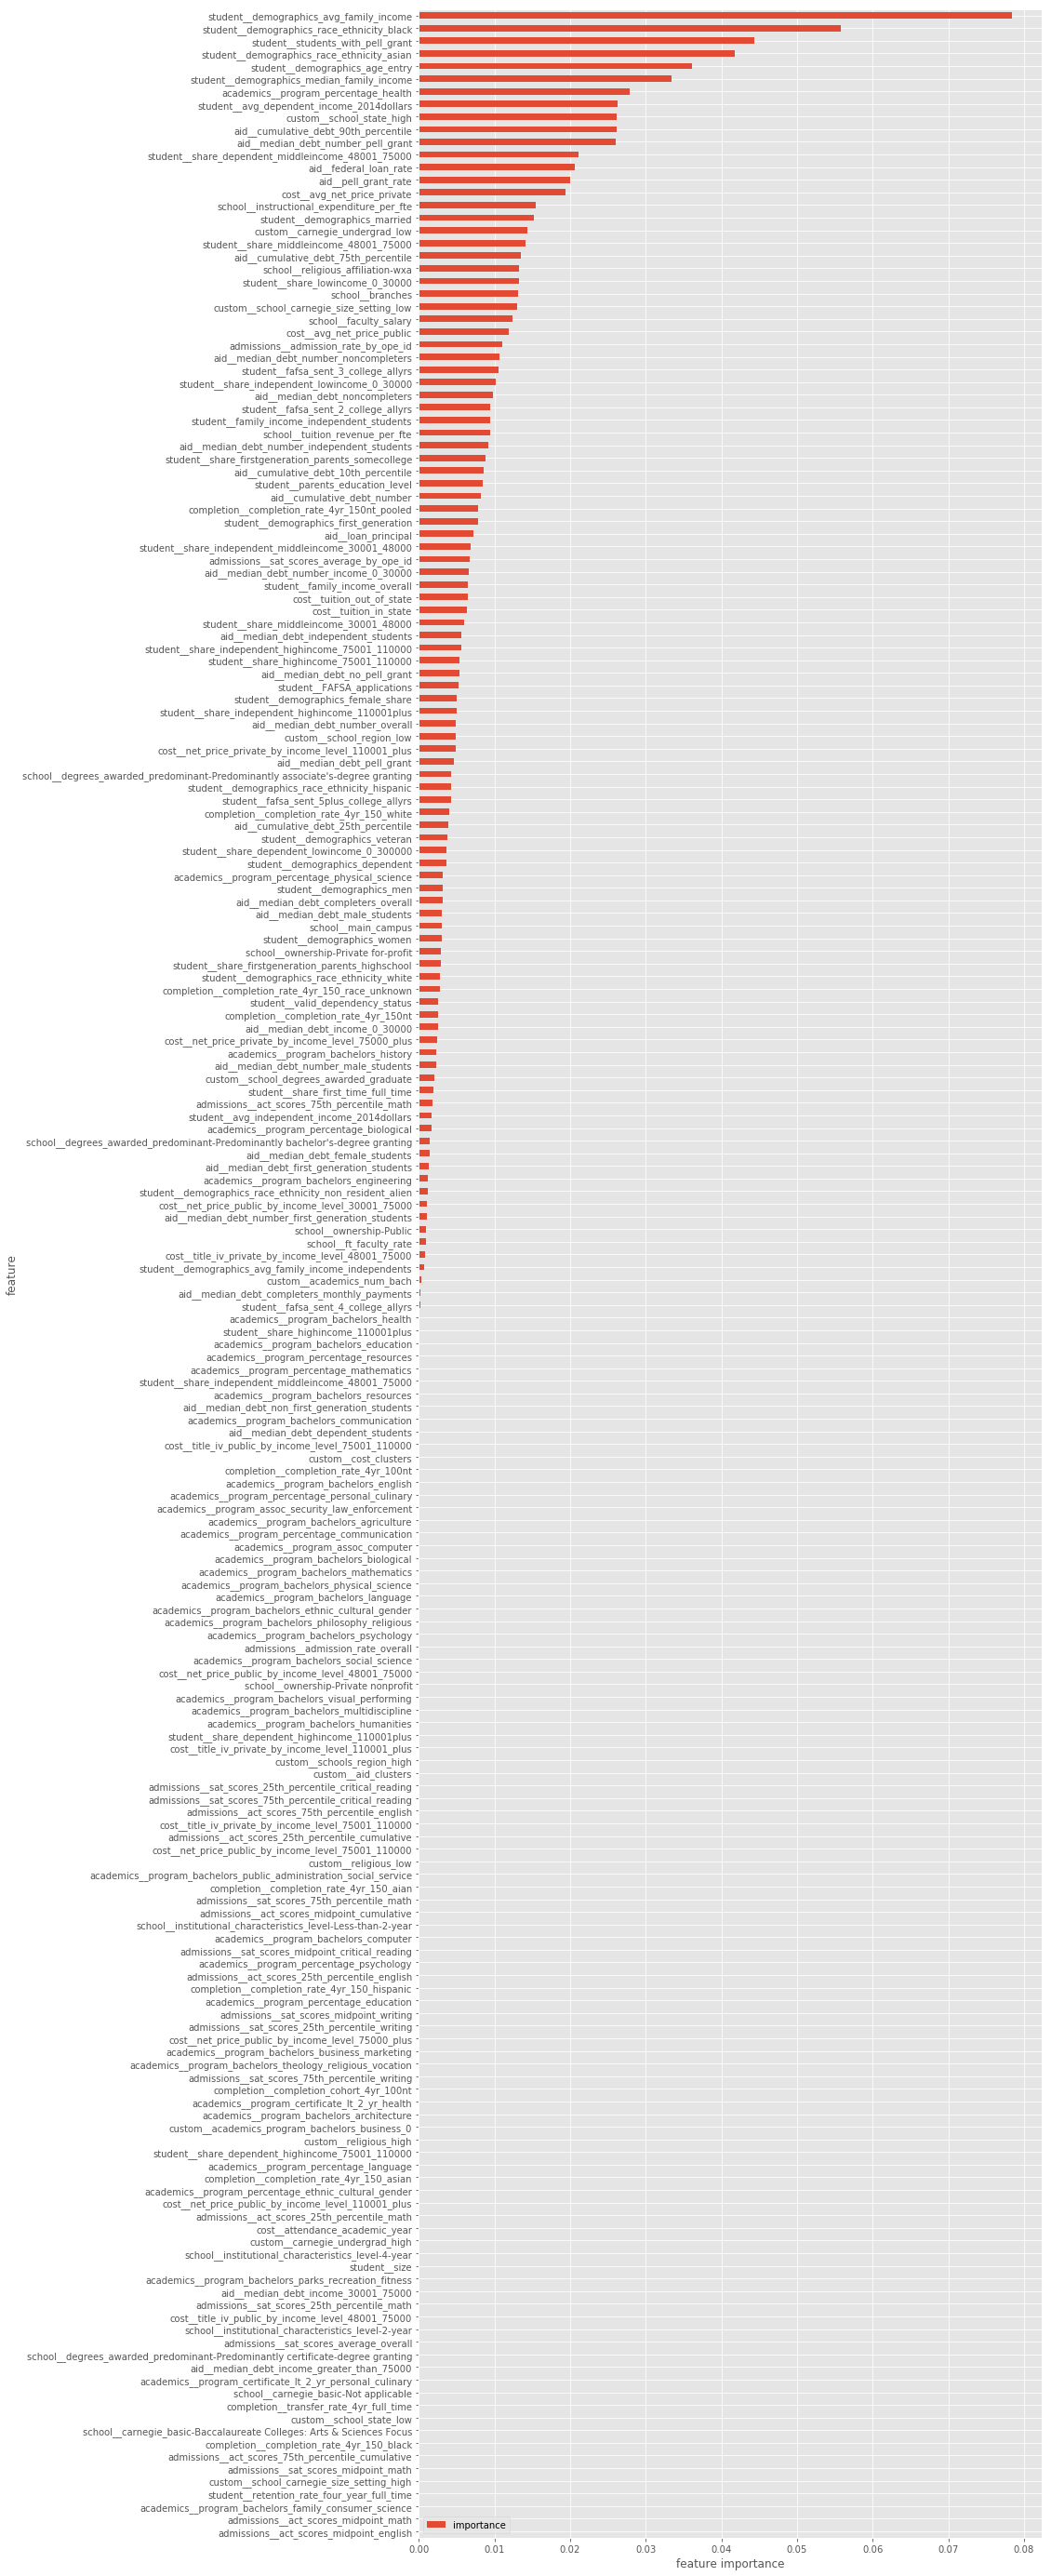

In [46]:
feat_imp = pd.DataFrame({'feature':df.columns, 'importance':pipe.named_steps['regressor'].feature_importances_}).sort_values(by='importance')
feat_imp.plot(kind='barh',figsize=(12,50))
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.yticks(np.arange(feat_imp.shape[0]), feat_imp.feature)


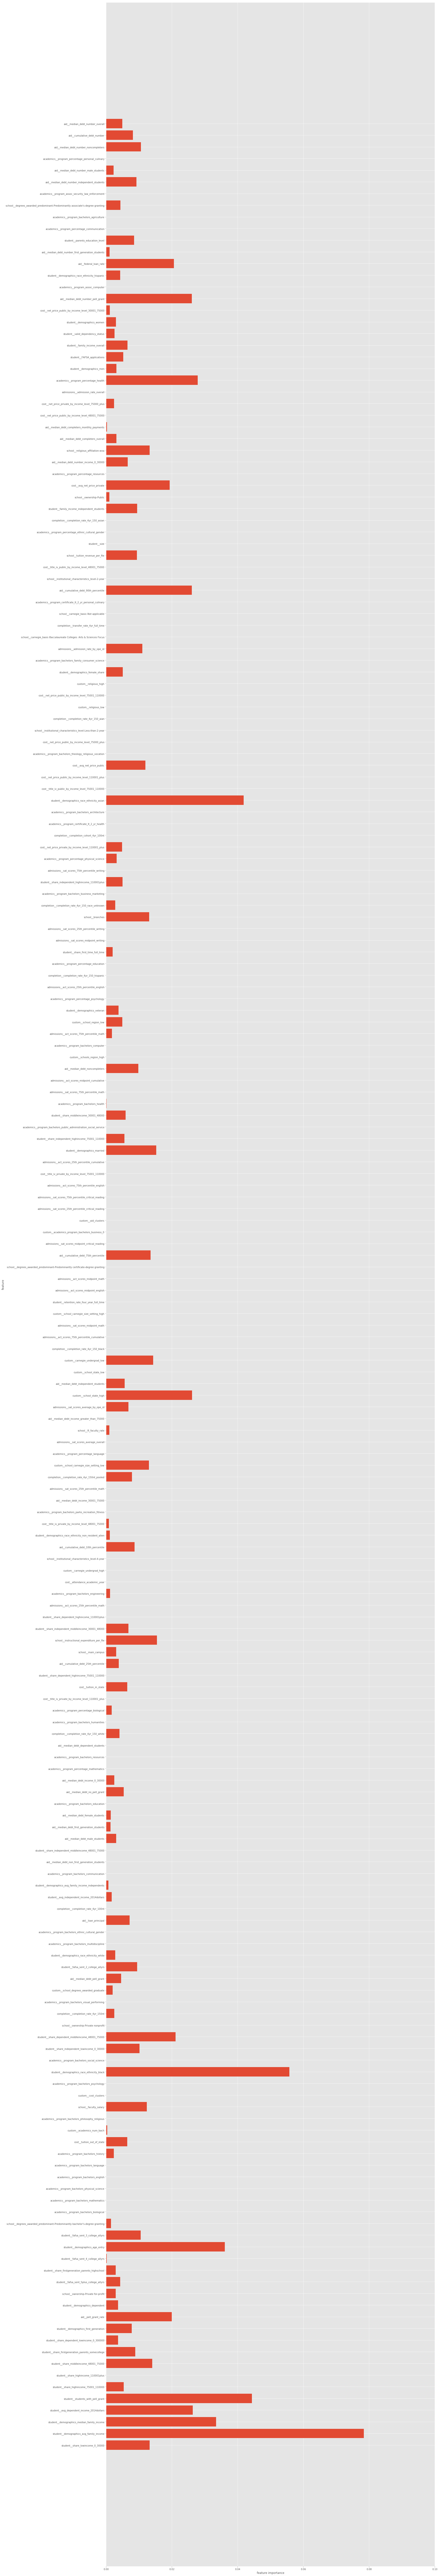

In [28]:

def plot_feature_importance(model, dataframe):
    n_features = dataframe.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataframe.columns) #np.arange(n_features))
    plt.xlabel('feature importance')
    plt.ylabel('feature')
plt.figure(figsize=(25,200))
plt.xlim(0, 0.1)
plot_feature_importance(pipe.named_steps['regressor'], df)